##House - Price Predictor

In [1]:
import pandas as pd

In [2]:
housing  = pd.read_csv("data.csv")

In [3]:
housing.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['RAD'].value_counts()

24    132
5     115
4     110
3      38
6      26
8      24
2      24
1      20
7      17
Name: RAD, dtype: int64

In [6]:
housing.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt

In [9]:
#housing.hist(bins = 50 , figsize = (20,15))

## Test-Train split

In [10]:
#splitting without using sklearn 
import numpy as np 
#def split_train_set(data , test_ratio):
#   shuffled = np.random.permutation(len(data))
   
#    test_set_size = int(len(data)*test_ratio)
 #   test_indices = shuffled[:test_set_size]
 #   train_indices = shuffled[test_set_size:]
 #   return data.iloc[train_indices ], data.iloc[test_indices]

#train_set , test_set = split_train_set(housing , 0.2)

In [11]:
from sklearn.model_selection import train_test_split
train_set , test_set = train_test_split(housing , test_size = 0.2 , random_state  = 42)
print(f"rows in train set {len(train_set)} \n rows in test set {len(test_set)} \n")

rows in train set 404 
 rows in test set 102 



In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1  , test_size = 0.2 , random_state = 42)
for train_index , test_index in split.split(housing  ,  housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [13]:
housing = strat_train_set

## Looking for corelations 

In [14]:
corr_matrix  =  housing.corr()

In [15]:
corr_matrix['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.679894
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

In [16]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='MEDV', ylabel='RM'>],
       [<AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>],
       [<AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='MEDV', ylabel='ZN'>],
       [<AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='MEDV', ylabel='MEDV'>]], dtype=object)

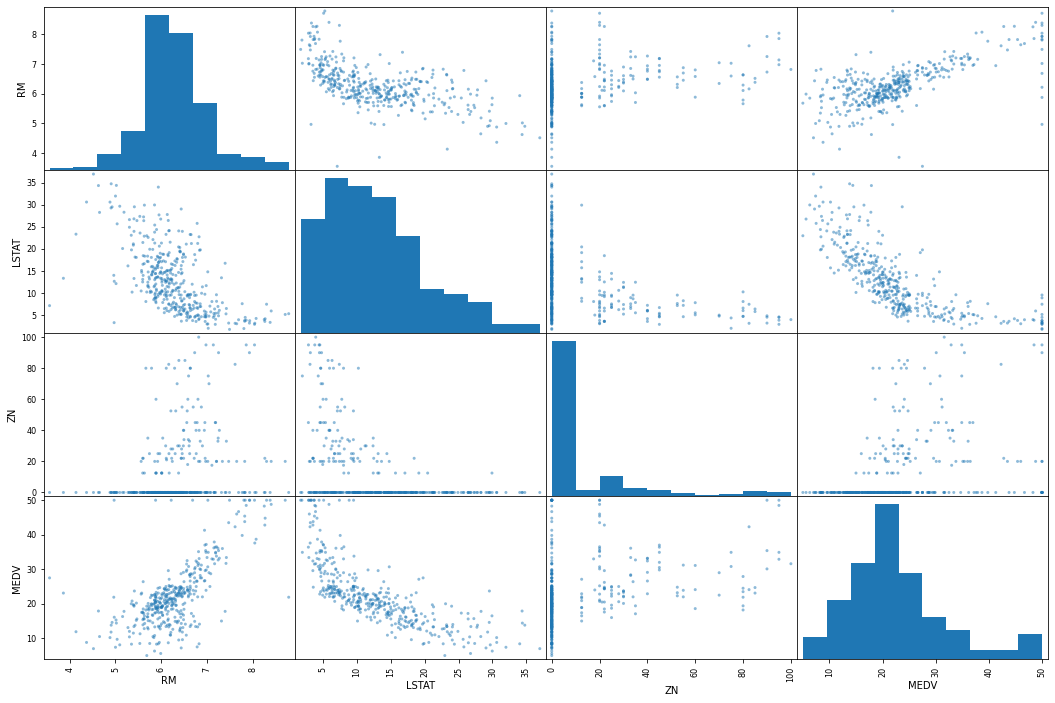

In [17]:
attr = ["RM" , "LSTAT" , "ZN" , "MEDV"]
scatter_matrix(housing[attr] , figsize = (18,12))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

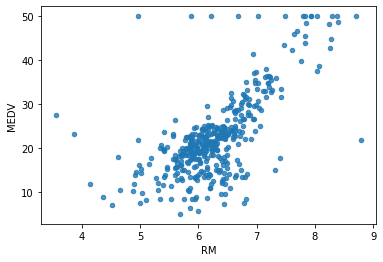

In [18]:
housing.plot(kind = "scatter" ,  x = "RM" , y = "MEDV" , alpha = 0.8)

## trying out attribute combinations 

In [19]:
#housing["TXPRM"] = housing["TAX"]/housing["RM"]

In [20]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0


In [21]:
#housing.plot(kind = "scatter" , x ="TXPRM" , y = "MEDV" , alpha = 0.8)

In [22]:
housing.shape

(404, 14)

In [23]:
housing =  strat_train_set.drop("MEDV" , axis =  1 )
housing_labels  = strat_train_set["MEDV"].copy()

## Missing Attributes

In [24]:
# in case of missing data points we have three options  . 
# 1. remove missing data points from data set . 
# 2. remove whole attribute of missing data point . 
# 3. replace missing values with mean  , median or 0 

In [25]:
a  =  housing.dropna(subset = ["RM"])
a.shape
''' if values had been missing shape would be altered by removing the null or missing data points  
and also not that original housing data will remain same this option 1 '''

' if values had been missing shape would be altered by removing the null or missing data points  \nand also not that original housing data will remain same this option 1 '

In [26]:
housing.drop("RM" , axis = 1 ).shape
#original housing data will not alter ..this is opton  2
# data will not be tranformed  since emplace != 1 

(404, 12)

In [27]:
# now for option 3 we will be replacing na values with median 
median = housing["RM"].median

In [28]:
housing["RM"].fillna(median) # option 3

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [29]:
housing.shape

(404, 13)

In [30]:
from sklearn.impute import SimpleImputer
Imputer = SimpleImputer(strategy = "median")
Imputer.fit(housing)

SimpleImputer(strategy='median')

In [31]:
Imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21000e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [32]:
x = Imputer.transform(housing)
housing_tr = pd.DataFrame(x, columns=housing.columns)

## scikit-learn Design

In [1]:
# fit
# transform 
#predict 

## feature scaling

In [33]:
# primarily two types of feature scaling
# 1 . min - max scaling (normalization) { (value - min) / (max - min)}
# sklearn provides MinMaxScaler for this
# 2 .  standardization {(value - min)/(std deviation) }
# sklearn provides a class called StandardScaler for this 

## Creating a Pipeline

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([('Imputer' , SimpleImputer(strategy = "median")) ,('std_scalar' , StandardScaler()) ])

In [35]:
housing_tr_num = my_pipeline.fit_transform(housing)
housing_tr_num.shape

(404, 13)

## select desired model for estate data

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
##model  = LinearRegression()
##model = DecisionTreeRegressor()
model = RandomForestRegressor()

model.fit(housing , housing_labels)

RandomForestRegressor()

In [37]:
some_data =  housing.iloc[10:15]
some_labels = housing_labels[10:15]

In [38]:
prepared_data = my_pipeline.transform(some_data)
model.predict(prepared_data)

array([43.222, 42.168, 42.253, 28.738, 42.168])

In [39]:
list(some_labels)

[16.3, 18.3, 8.1, 34.9, 24.5]

## Evaluating the Model

In [40]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing)
sme = mean_squared_error(housing_labels , housing_predictions)
rmse = np.sqrt(sme)

print(rmse)

1.224020300299204


In [41]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model , housing , housing_labels , scoring = "neg_mean_squared_error" , cv = 10)
rmse_scores = np.sqrt(-scores)
rmse_scores


array([2.8653707 , 2.71953725, 4.48284254, 2.67003094, 3.21661848,
       2.50959277, 4.67903362, 3.22478706, 3.28271477, 3.25542255])

In [42]:
def print_scores(scores):
 print("scores are :" , rmse_scores)
 print("Mean of scores :" , scores.mean())
 print("standard deviation of scores :" , scores.std())


In [43]:
print_scores(rmse_scores)

scores are : [2.8653707  2.71953725 4.48284254 2.67003094 3.21661848 2.50959277
 4.67903362 3.22478706 3.28271477 3.25542255]
Mean of scores : 3.2905950691153882
standard deviation of scores : 0.6973023229920238


## Saving The Model

In [44]:
from joblib import dump , load
dump(model , "housing_prediction.joblib")



['housing_prediction.joblib']

## Testing  the Model on test data

In [45]:
x_test = strat_test_set.drop("MEDV", axis  =  1)
y_test = strat_test_set["MEDV"].copy()
x_test_prepared = my_pipeline.fit_transform(x_test)
model.fit(x_test_prepared , y_test)
final_predicts = model.predict(x_test_prepared)
final_mse = mean_squared_error(y_test , final_predicts )
final_rmse = np.sqrt(final_mse)


In [46]:
final_rmse


1.5699699072924709